In [ ]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("Datasheets/gene_expression.csv")
data.head()


In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
sns.scatterplot(data=data,x='Gene One',y='Gene Two', hue='Cancer Present')

In [ ]:
X=data.drop('Cancer Present',axis=1)
y=data['Cancer Present']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)



In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(scaled_X_train,y_train)

In [ ]:
model.score(scaled_X_train,y_train)

In [ ]:
y_pred=model.predict(scaled_X_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)


In [ ]:


disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# K value selection


In [ ]:
l=[]

for k in range(1,30):
    k_model=KNeighborsClassifier(n_neighbors=k)
    k_model.fit(scaled_X_train,y_train)
    k_y_pred=k_model.predict(scaled_X_test)

    test_error=1- accuracy_score(k_y_pred,y_test)
    l.append(test_error)


In [ ]:
print(l)

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),l,label='Test Error')


e:\Code2025\Machine-Learning_LearningRepository\.TheEnvForMachineLearning\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Code2025\Machine-Learning_LearningRepository\.TheEnvForMachineLearning\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Pr

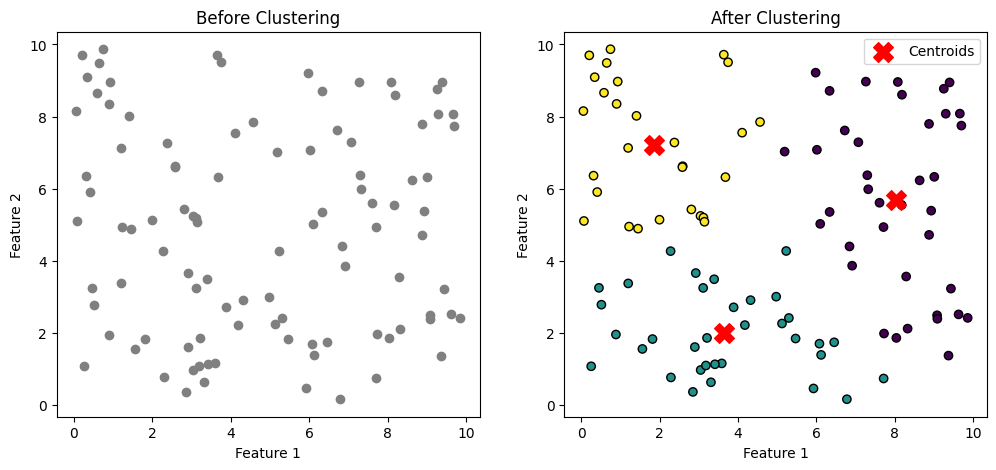

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random unclustered data
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points in 2D space

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot before clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='gray')
plt.title("Before Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot after clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title("After Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()
